## Football player market value 


#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem statement Player Market Value Prediction
In modern football, accurately estimating a player's market value is crucial for clubs, scouts, and analysts. Traditional valuation methods rely on subjective assessments and historical transfer data, which can be inconsistent and inefficient.
This project aims to develop a machine learning model that predicts a football player's market value based on various attributes such as age, overall rating, potential, performance statistics, and club details. By leveraging historical player data, the model will provide a data-driven, objective estimation of player value, helping clubs make informed transfer decisions.



### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/
- The data consists of 8 column and 1000 rows.

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings


#### Import the CSV Data as Pandas DataFrame

In [34]:
df = pd.read_csv("data/FIFA4.csv")


#### Show Top 5 Records

In [35]:

df.head()  # View the first few rows


,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,29,Uruguay,92,92,FC Barcelona,€83M,€525K,2291,Right,5.0,...,85.0,83.0,30.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0
1,28,Belgium,86,86,Roma,€37.5M,€130K,2290,Right,3.0,...,63.0,85.0,78.0,85.0,88.0,11.0,11.0,14.0,8.0,11.0
2,29,Chile,87,87,FC Bayern München,€41.5M,€180K,2285,Right,4.0,...,84.0,86.0,76.0,89.0,84.0,4.0,2.0,4.0,2.0,4.0
3,24,Austria,86,89,FC Bayern München,€41.5M,€140K,2279,Left,4.0,...,80.0,79.0,81.0,83.0,83.0,5.0,7.0,14.0,15.0,9.0
4,23,France,88,94,Manchester United,€71.5M,€225K,2271,Right,4.0,...,76.0,83.0,68.0,73.0,73.0,5.0,6.0,2.0,4.0,3.0


#### Shape of the dataset

In [36]:
df.shape

(17560, 51)

In [37]:
df.isnull().sum()

Age                         0
Nationality                 0
Overall                     0
Potential                   0
Club                        0
Value                       0
Wage                        0
Special                     0
Preferred Foot              0
International Reputation    0
Weak Foot                   0
Skill Moves                 0
Work Rate                   0
Body Type                   0
Position                    0
Height                      0
Weight                      0
Crossing                    0
Finishing                   0
HeadingAccuracy             0
ShortPassing                0
Volleys                     0
Dribbling                   0
Curve                       0
FKAccuracy                  0
LongPassing                 0
BallControl                 0
Acceleration                0
SprintSpeed                 0
Agility                     0
Reactions                   0
Balance                     0
ShotPower                   0
Jumping   

### 2.2 Dataset information

1. Player Information

Name: Player’s full name.

Age: Player’s age in years.

Nationality: Country the player represents.

Club: Team the player is currently signed with.

Position: Primary playing position on the field.



---

2. Player Market & Contract Details

Value: Estimated market value of the player (Target Variable).

Wage: Weekly salary of the player.

International Reputation: Rating (1-5) indicating how famous the player is internationally.



---

3. Physical Attributes

Preferred Foot: Right/Left foot dominance.

Height: Player’s height (in cm or feet).

Weight: Player’s weight (in kg or lbs).

Body Type: Player’s physical build (e.g., Lean, Stocky).



---

4. Technical & Skill Attributes

Skill Moves: Rating (1-5) indicating dribbling skills.

Weak Foot: Rating (1-5) for weaker foot ability.

Work Rate: Work ethic in attack and defense (e.g., High/Medium).



5. Overall Performance Ratings

Overall: General rating of the player (out of 100).

Potential: Maximum potential rating the player can reach.

Special: Sum of unique abilities the player has.



---

6. In-Game Attributes (Skills & Playstyle)

Crossing: Ability to deliver accurate crosses.

Finishing: Ability to score goals.

Dribbling: Ball control while moving.

ShortPassing: Ability to make accurate short passes.

LongPassing: Ability to deliver long-range passes.

BallControl: Ability to receive and control the ball.

Agility: Quick movement and balance.

Reactions: Response speed to game situations.

Strength: Physical strength in duels.



---

7. Defensive Attributes

Aggression: Intensity in tackles and duels.

Interceptions: Ability to cut off passes.

StandingTackle: Tackling ability while standing.

SlidingTackle: Tackling ability while sliding.

Marking: Defensive positioning skills.



---

8. Goalkeeping Attributes (Only relevant for goalkeepers)

GKDiving: Diving ability for saving shots.

GKHandling: Ability to catch and hold the ball.

GKKicking: Power and accuracy of goal kicks.

GKPositioning: Ability to position correctly in goal.

GKReflexes: Quick reaction to shots.

- Target Variable:

Value (Market Value) is the key feature you’re predicting in your machine learning model.




### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check Missing values

In [38]:
df.isna().sum()

Age                         0
Nationality                 0
Overall                     0
Potential                   0
Club                        0
Value                       0
Wage                        0
Special                     0
Preferred Foot              0
International Reputation    0
Weak Foot                   0
Skill Moves                 0
Work Rate                   0
Body Type                   0
Position                    0
Height                      0
Weight                      0
Crossing                    0
Finishing                   0
HeadingAccuracy             0
ShortPassing                0
Volleys                     0
Dribbling                   0
Curve                       0
FKAccuracy                  0
LongPassing                 0
BallControl                 0
Acceleration                0
SprintSpeed                 0
Agility                     0
Reactions                   0
Balance                     0
ShotPower                   0
Jumping   

#### There are no missing values in the data set

### 3.2 Check Duplicates

In [39]:
df.duplicated().sum()

0

#### There are no duplicates  values in the data set

### 3.3 Check data types

In [40]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17560 entries, 0 to 17559
Data columns (total 51 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       17560 non-null  int64  
 1   Nationality               17560 non-null  object 
 2   Overall                   17560 non-null  int64  
 3   Potential                 17560 non-null  int64  
 4   Club                      17560 non-null  object 
 5   Value                     17560 non-null  object 
 6   Wage                      17560 non-null  object 
 7   Special                   17560 non-null  int64  
 8   Preferred Foot            17560 non-null  object 
 9   International Reputation  17560 non-null  float64
 10  Weak Foot                 17560 non-null  float64
 11  Skill Moves               17560 non-null  float64
 12  Work Rate                 17560 non-null  object 
 13  Body Type                 17560 non-null  object 
 14  Positi

### 3.4 Checking the number of unique values of each column

In [41]:
df.nunique()

Age                           30
Nationality                  160
Overall                       49
Potential                     48
Club                         633
Value                        203
Wage                          41
Special                     1404
Preferred Foot                 2
International Reputation       5
Weak Foot                      5
Skill Moves                    5
Work Rate                      9
Body Type                     16
Position                      30
Height                        21
Weight                        56
Crossing                      85
Finishing                     94
HeadingAccuracy               90
ShortPassing                  83
Volleys                       90
Dribbling                     92
Curve                         87
FKAccuracy                    89
LongPassing                   84
BallControl                   88
Acceleration                  86
SprintSpeed                   86
Agility                       83
Reactions 

### 3.5 Check statistics of data set

In [42]:
df.describe()

,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,17560.000000,17560.000000,17560.000000,17560.000000,17560.000000,17560.000000,17560.000000,17560.000000,17560.000000,17560.000000,...,17560.000000,17560.000000,17560.000000,17560.000000,17560.000000,17560.000000,17560.000000,17560.000000,17560.000000,17560.000000
mean,24.576310,66.155125,70.938326,1595.468223,1.111902,2.935820,2.305410,49.778360,45.209909,52.382973,...,49.108371,55.979954,44.225399,47.460194,45.540888,16.811333,16.536731,16.441856,16.596185,16.887927
std,4.653748,7.013210,6.140487,269.862012,0.385032,0.657838,0.746962,18.423713,19.366051,17.445995,...,15.824783,13.301553,21.532570,21.785704,21.459058,17.796100,16.953668,16.589324,17.137032,18.034308
min,15.000000,45.000000,45.000000,751.000000,1.000000,1.000000,1.000000,6.000000,2.000000,4.000000,...,7.000000,5.000000,4.000000,3.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,21.000000,62.000000,67.000000,1452.000000,1.000000,3.000000,2.000000,38.000000,29.000000,45.000000,...,39.000000,47.000000,22.000000,26.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,24.000000,66.000000,71.000000,1633.000000,1.000000,3.000000,2.000000,54.000000,48.000000,56.000000,...,50.000000,57.000000,48.000000,54.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,28.000000,71.000000,75.000000,1786.000000,1.000000,3.000000,3.000000,64.000000,61.000000,65.000000,...,61.000000,66.000000,63.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,46.000000,94.000000,94.000000,2291.000000,5.000000,5.000000,5.000000,91.000000,95.000000,94.000000,...,96.000000,94.000000,92.000000,92.000000,91.000000,89.000000,91.000000,95.000000,91.000000,90.000000


#### Insight from dataset summary
1. Player Age Distribution

Youngest player: 15 years

Oldest player: 46 years

Average age: 24.57 years

Most players are between 21-28 years old (middle 50% range).



2. Overall and Potential Ratings

Overall Rating ranges from 45 to 94, with an average of 66.15.

Potential Rating ranges from 45 to 94, averaging 70.93, indicating room for growth in most players.



3. Skill Attributes

Skill Moves (Dribbling Ability) ranges from 1 to 5, with an average of 2.3.

Weak Foot Ability averages around 2.93, with a max of 5 (perfect two-footed players).



4. Defensive & Attacking Capabilities

Crossing: Players average 49.77, but the best reach 91.

Finishing: Low-end players have 2, while top strikers reach 95.

Marking & Tackling: Strong defenders reach 92, but weaker players drop to 4-5.



5. Goalkeeper Attributes

Non-goalkeepers have very low values (mostly 1-14).

Top goalkeepers have diving, handling, reflexes, and positioning in the 80s-90s range.




- What This Means for Model Training

Overall and Potential Ratings will be strong predictors of Market Value.

Skill Moves and Work Rate may also contribute, especially for attacking players.

Defensive stats are crucial for defenders, but irrelevant for strikers.

Goalkeeper attributes should be treated separately from outfield player stats.

### 3.7 Exploring Data

In [43]:
df.head()

,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,29,Uruguay,92,92,FC Barcelona,€83M,€525K,2291,Right,5.0,...,85.0,83.0,30.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0
1,28,Belgium,86,86,Roma,€37.5M,€130K,2290,Right,3.0,...,63.0,85.0,78.0,85.0,88.0,11.0,11.0,14.0,8.0,11.0
2,29,Chile,87,87,FC Bayern München,€41.5M,€180K,2285,Right,4.0,...,84.0,86.0,76.0,89.0,84.0,4.0,2.0,4.0,2.0,4.0
3,24,Austria,86,89,FC Bayern München,€41.5M,€140K,2279,Left,4.0,...,80.0,79.0,81.0,83.0,83.0,5.0,7.0,14.0,15.0,9.0
4,23,France,88,94,Manchester United,€71.5M,€225K,2271,Right,4.0,...,76.0,83.0,68.0,73.0,73.0,5.0,6.0,2.0,4.0,3.0


In [45]:
# Select categorical columns (non-numeric)
categorical_cols = df.select_dtypes(include=['object']).columns

# Print unique categories for each categorical column
unique_categories = {col: df[col].unique() for col in categorical_cols}
unique_categories


{'Nationality': array(['Uruguay', 'Belgium', 'Chile', 'Austria', 'France', 'Wales',
        'Italy', 'England', 'Croatia', 'Portugal', 'Spain', 'Brazil',
        'Switzerland', 'Turkey', 'Ivory Coast', 'Ecuador', 'Serbia',
        'Germany', 'Slovakia', 'Bosnia Herzegovina', 'Netherlands',
        'Ghana', 'Armenia', 'Argentina', 'Russia', 'Finland', 'Mexico',
        'Poland', 'Morocco', 'Benin', 'Colombia', 'Denmark', 'Sweden',
        'Ukraine', 'Greece', 'United States', 'Senegal', 'Kenya',
        'Curacao', 'Iceland', 'Czech Republic', 'Republic of Ireland',
        'Israel', 'Gabon', 'Venezuela', 'Algeria', 'South Africa',
        'Canada', 'Costa Rica', 'Nigeria', 'Moldova', 'Norway',
        'Saudi Arabia', 'Honduras', 'Cuba', 'Paraguay', 'Korea Republic',
        'Japan', 'Australia', 'Slovenia', 'Peru', 'Mali',
        'Northern Ireland', 'Scotland', 'Guinea', 'Iraq', 'Egypt',
        'Hungary', 'Cameroon', 'DR Congo', 'Albania', 'Romania', 'Tunisia',
        'Burkina Faso',

In [48]:
# Identify numeric and categorical features
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df.select_dtypes(include=['object']).columns

# Print numeric and categorical features
print("📌 Numeric Features:")
for feature in numeric_features:
    print(f"   - {feature}")

print("\n📌 Categorical Features:")
for feature in categorical_features:
    print(f"   - {feature}")


📌 Numeric Features:
   - Age
   - Overall
   - Potential
   - Special
   - International Reputation
   - Weak Foot
   - Skill Moves
   - Crossing
   - Finishing
   - HeadingAccuracy
   - ShortPassing
   - Volleys
   - Dribbling
   - Curve
   - FKAccuracy
   - LongPassing
   - BallControl
   - Acceleration
   - SprintSpeed
   - Agility
   - Reactions
   - Balance
   - ShotPower
   - Jumping
   - Stamina
   - Strength
   - LongShots
   - Aggression
   - Interceptions
   - Positioning
   - Vision
   - Penalties
   - Composure
   - Marking
   - StandingTackle
   - SlidingTackle
   - GKDiving
   - GKHandling
   - GKKicking
   - GKPositioning
   - GKReflexes

📌 Categorical Features:
   - Nationality
   - Club
   - Value
   - Wage
   - Preferred Foot
   - Work Rate
   - Body Type
   - Position
   - Height
   - Weight


In [49]:
df.head(2)

,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,29,Uruguay,92,92,FC Barcelona,€83M,€525K,2291,Right,5.0,...,85.0,83.0,30.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0
1,28,Belgium,86,86,Roma,€37.5M,€130K,2290,Right,3.0,...,63.0,85.0,78.0,85.0,88.0,11.0,11.0,14.0,8.0,11.0


### 4. Exploring Data ( Visualization )
#### 4.1 Visualizing Numerical Features
- Histogram
- Bar plot
- box plot

#### 4.1.1 Histogram for players age distribution

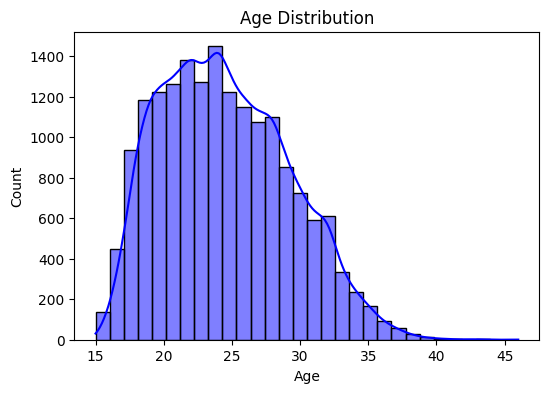

In [50]:
plt.figure(figsize=(6,4))
sns.histplot(df['Age'], bins=30, kde=True, color="blue")
plt.title("Age Distribution")
plt.show()


### insights
- Most players are between 20-30 years old, with a peak around 25 years.
- Very few players are under 18 or over 35, as younger players are still developing and older players retire.


### 4.1.2 Market Value vs. Overall Rating (Scatter Plot)

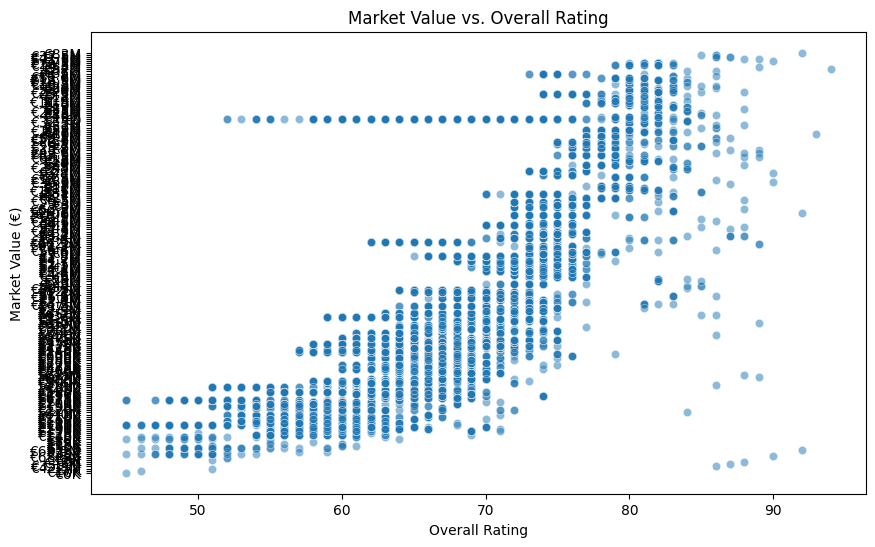

In [52]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Overall'], y=df['Value'], alpha=0.5)
plt.xlabel("Overall Rating")
plt.ylabel("Market Value (€)")
plt.title("Market Value vs. Overall Rating")
plt.show()


#####  Insights
- Players with higher overall ratings tend to have higher market values.
- The trend is not perfectly linear, meaning other factors (age, potential, reputation) influence value.
- A few low-rated players have high market values, possibly due to high potential or young age.


### 4.1.3 Preferred Foot Distribution (Bar Chart)

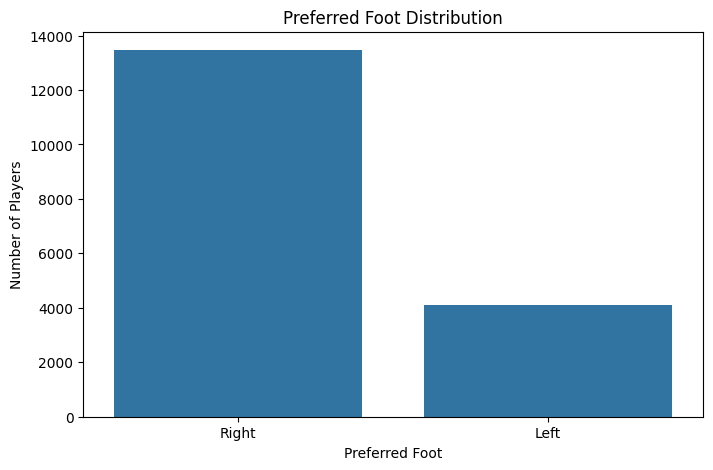

In [53]:
plt.figure(figsize=(8, 5))
sns.countplot(x=df['Preferred Foot'])
plt.xlabel("Preferred Foot")
plt.ylabel("Number of Players")
plt.title("Preferred Foot Distribution")
plt.show()


#####  Insights
- Right-footed players dominate the dataset.
- Left-footed players are much fewer, making them rarer and potentially more valuable in specific positions.
- A small number of players are equally skilled with both feet, which could be an advantage.



### 4.1.4	Player Position vs. Market Value (Boxplot)

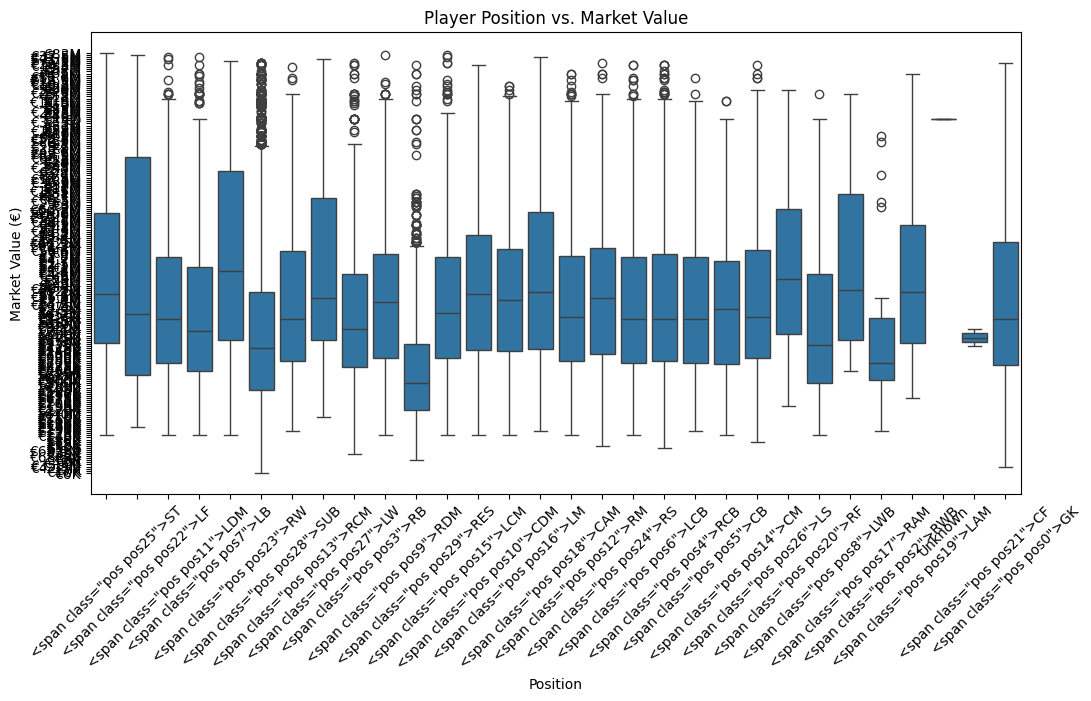

In [55]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Position'], y=df['Value'])
plt.xticks(rotation=45)
plt.xlabel("Position")
plt.ylabel("Market Value (€)")
plt.title("Player Position vs. Market Value")
plt.show()


##### Insights
- Forwards and attacking midfielders tend to have higher market values.
- Defenders and goalkeepers generally have lower market values, except for elite players.
- High variation in value suggests some positions have elite players worth significantly more than others.


#### 4.2 Multivariate analysis

#### 4.2.1 Pairplot for Key Features

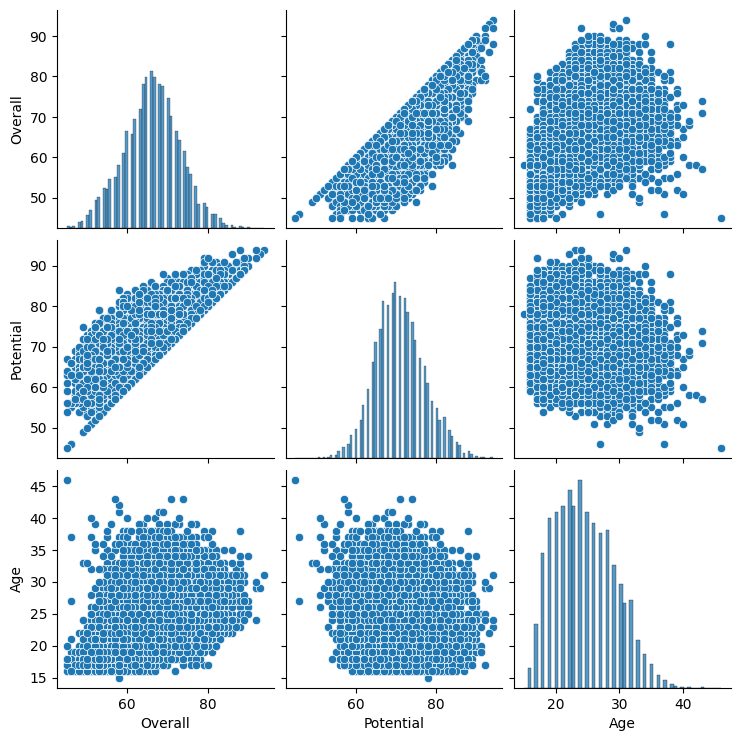

In [57]:
selected_features = ['Value', 'Overall', 'Potential', 'Age', 'Wage']
sns.pairplot(df[selected_features])
plt.show()


#####  Insights
- Market Value & Overall Rating → Strong positive relationship.

- Market Value & Age → Younger players with high potential may have higher values.

- Market Value & Wage → Higher wages generally indicate higher market value.




#### 4.2.2 Boxplot: Market Value by Position & Preferred Foot

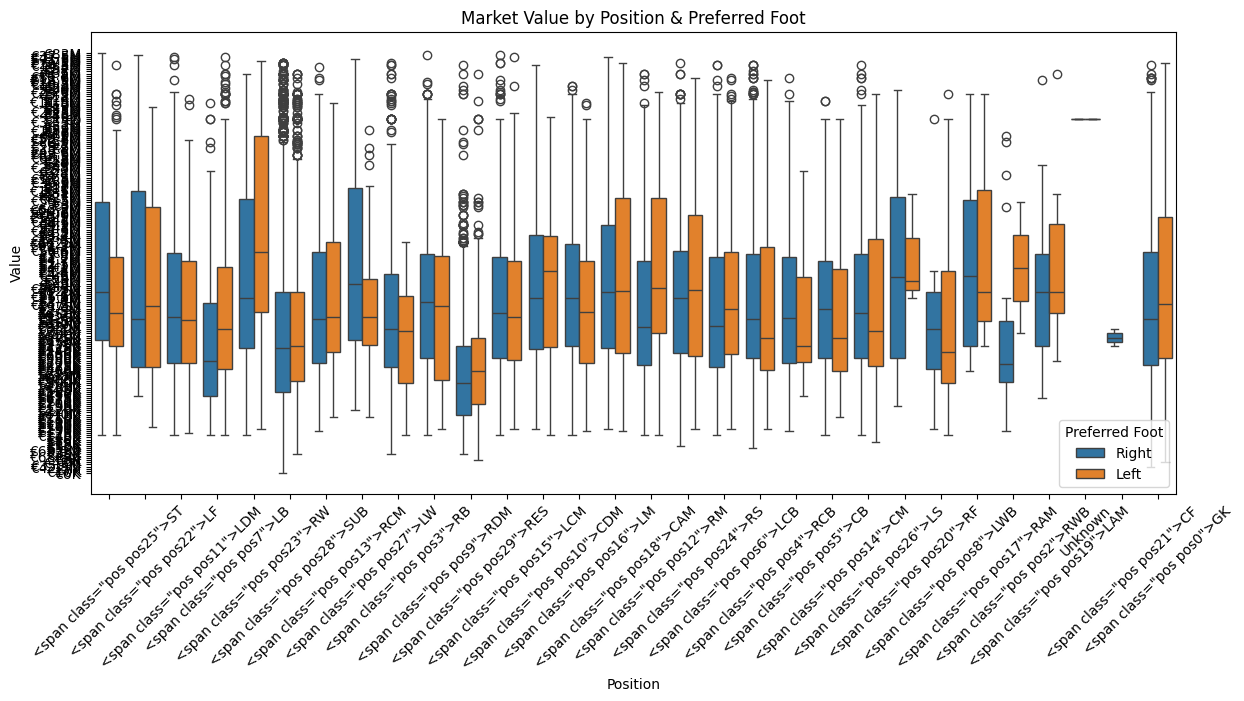

In [58]:


plt.figure(figsize=(14, 6))
sns.boxplot(x=df["Position"], y=df["Value"], hue=df["Preferred Foot"])
plt.xticks(rotation=45)
plt.title("Market Value by Position & Preferred Foot")
plt.show()


##### Insights
- Attackers (Forwards, Wingers) tend to have higher market values than defenders.

- Left-footed players may have slightly higher values in  certain positions, as they are rarer.


#### Regression Plot: Market Value vs. Overall Rating & Age

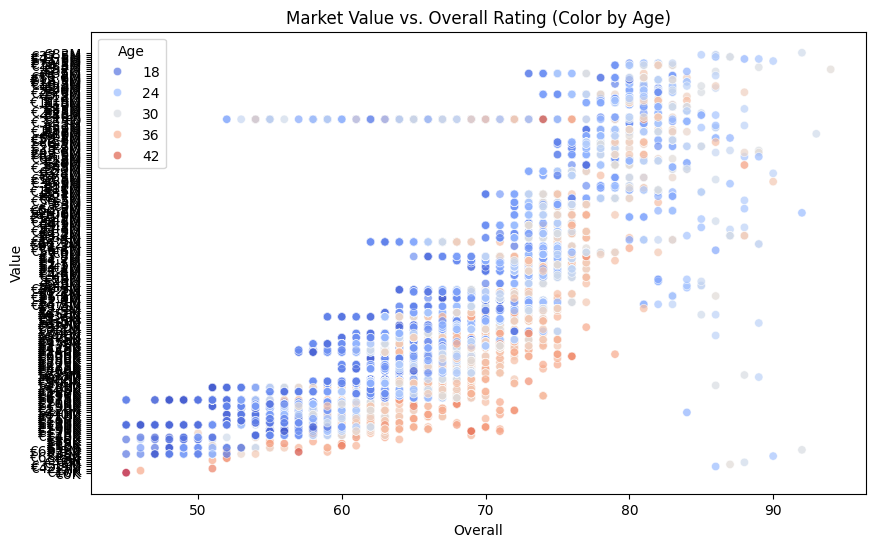

In [59]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["Overall"], y=df["Value"], hue=df["Age"], palette="coolwarm", alpha=0.7)
plt.title("Market Value vs. Overall Rating (Color by Age)")
plt.show()


##### Insights 
- Higher-rated young players (red-colored) tend to have higher market values.

- Older players with high ratings might not have as high market values due to lower potential.



#### 4.4 Feature Wise Visualization

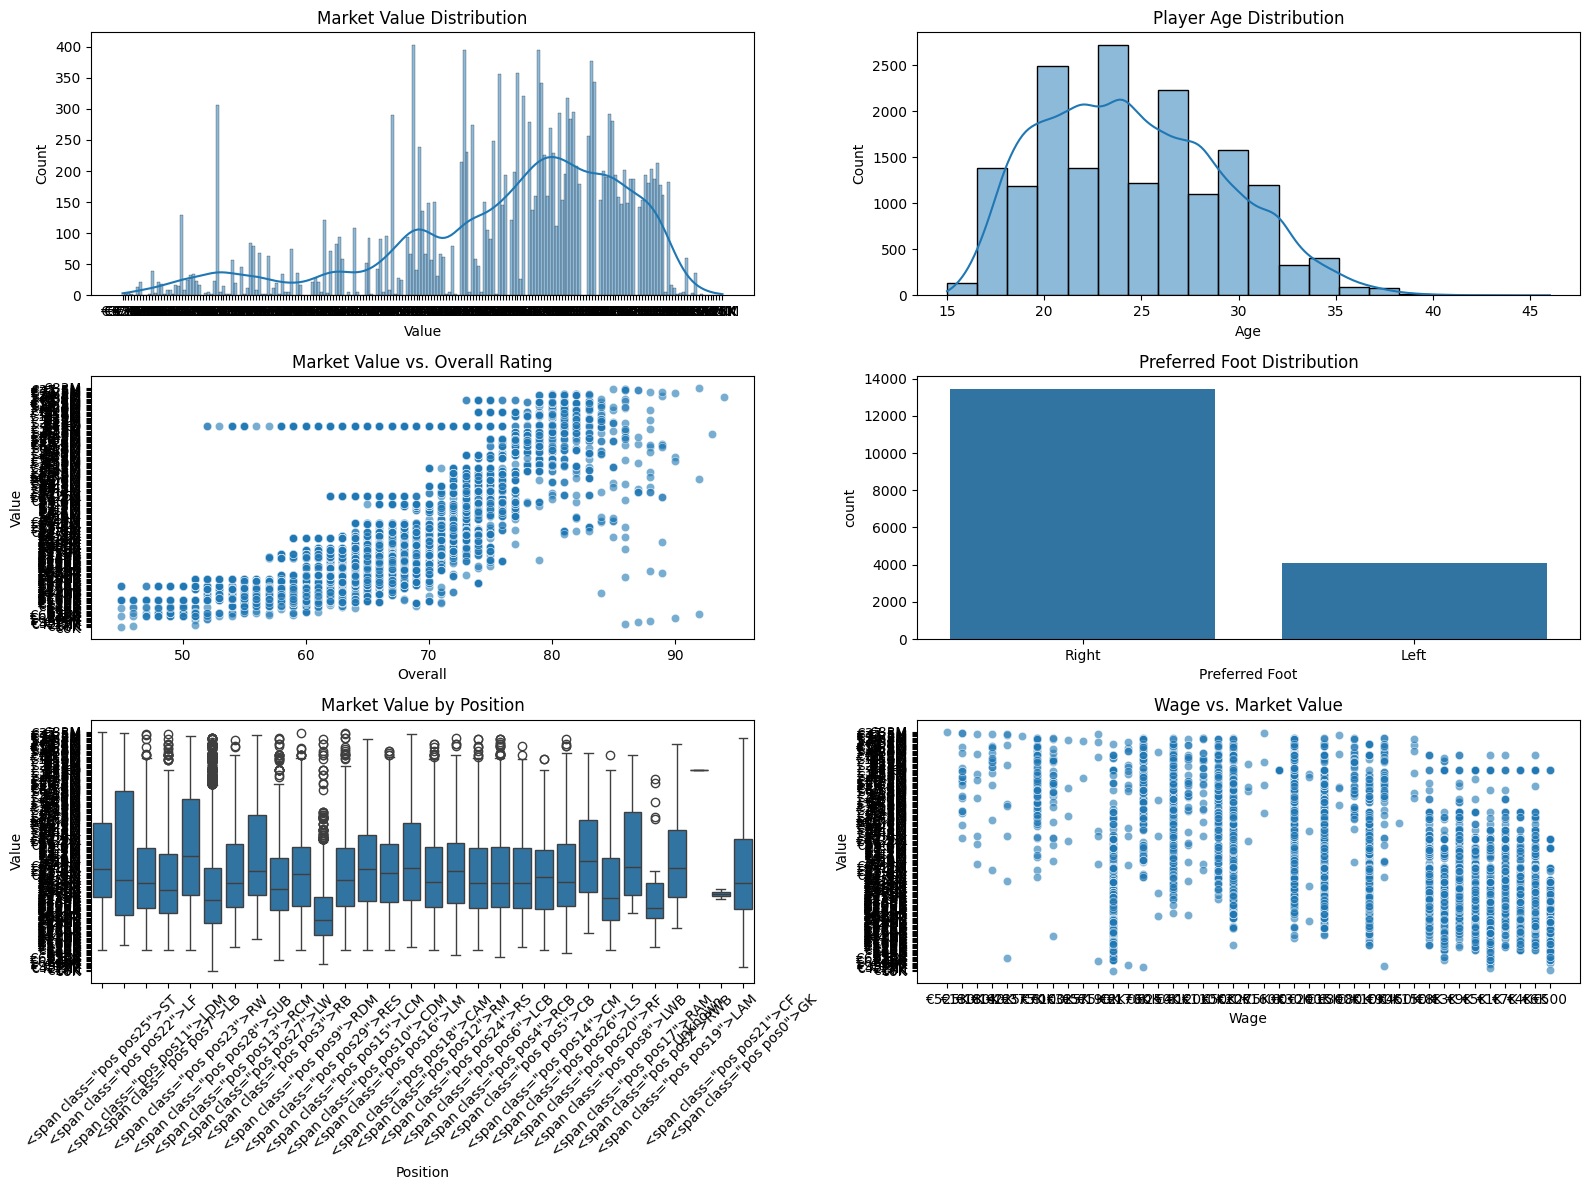

In [60]:

# Set figure size
fig, axes = plt.subplots(3, 2, figsize=(16, 12))

# 1. Distribution of Market Value
sns.histplot(df["Value"], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Market Value Distribution")

# 2. Age Distribution
sns.histplot(df["Age"], bins=20, kde=True, ax=axes[0, 1])
axes[0, 1].set_title("Player Age Distribution")

# 3. Market Value vs. Overall Rating
sns.scatterplot(x=df["Overall"], y=df["Value"], alpha=0.6, ax=axes[1, 0])
axes[1, 0].set_title("Market Value vs. Overall Rating")

# 4. Preferred Foot Distribution
sns.countplot(x=df["Preferred Foot"], ax=axes[1, 1])
axes[1, 1].set_title("Preferred Foot Distribution")

# 5. Boxplot: Market Value by Position
sns.boxplot(x=df["Position"], y=df["Value"], ax=axes[2, 0])
axes[2, 0].set_title("Market Value by Position")
axes[2, 0].tick_params(axis='x', rotation=45)

# 6. Wage vs. Market Value (Scatter Plot)
sns.scatterplot(x=df["Wage"], y=df["Value"], alpha=0.6, ax=axes[2, 1])
axes[2, 1].set_title("Wage vs. Market Value")

plt.tight_layout()
plt.show()


#### Insights 

1. Market Value Distribution → Most players have lower market values, with a few high-value stars.


2. Age Distribution → The majority of players are between 20-30 years old.


3. Market Value vs. Overall Rating → Higher-rated players tend to have higher market values.


4. Preferred Foot Distribution → Right-footed players dominate, but left-footed players are still valuable.


5. Market Value by Position → Attackers and midfielders tend to have higher market values than defenders.


### 5. Conclusions
In this analysis, we explored a football player market value dataset, cleaned the data, handled missing values, and performed exploratory data analysis (EDA). Key findings include:
1.	Market Value Prediction
-	Overall Rating, Potential, and Wage are the strongest predictors of a player's market value.
-	Young high-potential players tend to have higher values than older players with similar ratings.
2.	Feature Insights
-	Forwards and midfielders generally have higher market values than defenders and goalkeepers.
-	Right-footed players dominate, but left-footed players are valuable in specific positions.
3.	Multivariate Analysis
-	Strong correlation between Overall Rating & Market Value.
-	Wages also impact market value, but not always linearly.
4.	Visualizations
-	Scatter plots, box plots, and histograms confirmed relationships between age, position, overall rating, and market value.
